# Are you getting spam messages in your inbox???
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTLLx3jilwIExEUyOBnj_pRKGS0E-IEel_jTVE8eSzVgBsYeH1Q" width="500px" align="left">



**What are Spam messages ? **

Spam messages are unsolicited, usually commercial messages (such as e-mails, text messages, or Internet postings) sent to a large number of recipients or posted in a large number of places.

**Problem Statement : ** Accurately classifing spam messages by building a predictive model. 

**Solution : ** By doing data preprocessing and predictive analysis using naive bayes, we can achieve the goal of accurately classifing spam messages.

**Agenda :**
1. [Import libraries](#1)
2. [Load the data](#2)
3. [Exploratory Data Analysis](#3)
    * [Dropping null data](#4)
    * [Renaming columns](#5)    
    * [Counting values in `label`](#6)
    * [Checking shape of the dataset](#7)
    * [Dropping duplicates](#8)
    * [Checking shape of the dataset after dropping duplicates](#9)
    * [Mapping `label`](#10)
    * [Dropping `label` column](#11)
4. [Data Preprocessing](#12)
    * [Removing Punctuations](#12)
    * [Removing Stopwords](#12)
5. [Data Visualization](#13)
    * [WordCloud for spam messages](#14)
    * [WordCloud for ham messages](#15)
6. [Feature Extraction](#16)
7. [Train and Test split](#17)
8. [Predictive Analysis](#18)
9. [Model Evaluation](#19)

## 1. Import libraries<a id="1"></a>

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import string
import pandas as pd
%matplotlib inline

## 2. Load the data<a id="2"></a>

In [2]:
mails = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv",encoding = 'latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 3. Exploratory Data Analysis<a id="3"></a>

### Dropping null data <a id="4"></a>

In [3]:
# drop the null columns namely Unnamed: 2, Unnamed: 3 and Unnamed: 4

mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1,inplace=True)
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Renaming columns <a id="5"></a>

In [4]:
# renaming the columns v1 and v2 as labels and message

mails.rename(columns = {'v1':'labels', 'v2':'message'}, inplace=True)
mails.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Counting values in `label`<a id="6"></a>

In [5]:
# count of labels

mails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

### Checking shape of the data<a id="7"></a>

In [6]:
mails.shape

(5572, 2)

### Dropping duplicates<a id="8"></a>

In [7]:
# now, we will see if our dataset contains duplicates, we will drop the duplicates

mails.drop_duplicates(inplace=True)

### Checking for the shape of the data after dropping duplicates<a id="9"></a>

In [8]:
# after droping duplicates let's see the shape of dataset again

mails.shape

(5169, 2)

As we see our dataset had contained 403 duplicates.

In [9]:
# check for any null values in the dataset

mails.isnull().sum()

labels     0
message    0
dtype: int64

Thus, there is no null value in the data.

### Mapping `label`<a id="10"></a>

In [10]:
# mapping the labels as 0 or 1
# 0 for ham and 1 for spam

mails['label'] = mails['labels'].map({'ham': 0, 'spam': 1})
mails.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Dropping `label` column<a id="11"></a>

In [11]:
# now, labels column is of no use so we will drop the labels columns

mails.drop(['labels'], axis=1, inplace=True)
mails.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## 4. Data Preprocessing<a id = "12"></a>
Preprocessing is one of the major steps when we are dealing with any kind of text models. During this stage we have to look at the distribution of our data, what techniques are needed and how deep we should clean.

This step never has a one hot rule, and totally depends on the problem statement. Few mandatory preprocessing are converting to lowercase, removing punctuation, removing stop words and lemmatization/stemming. In our problem statement it seems like the basic preprocessing steps will be sufficient.

We will tokenize or preprocess our dataset using some techniques. Tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words.
> Punctuations are the unnecessary symbols that are in our corpus documents.

> Stop words are the most commonly occurring words which don’t give any additional value to the document vector. in-fact removing these will increase computation and space efficiency.


In [12]:
def process_text(text):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    #nopunc = [char for char in text if char not in string.punctuation]
    nopunc = []
    for char in text:
        if char not in string.punctuation:
            nopunc.append(char)
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [13]:
#show the tokenization 

mails['message'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## 5. Data Visualization<a id = "13"></a>

Now, we will see frequently used words using WordCloud.

### WordCloud for spam messages<a id='14'></a>

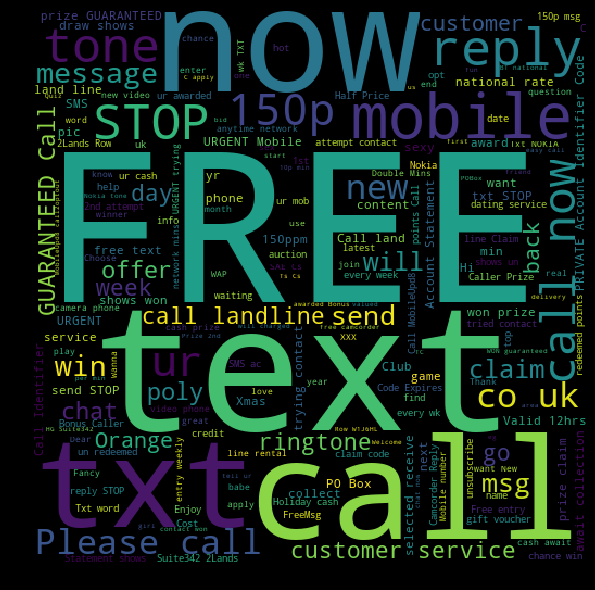

In [14]:
spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### WordCloud for ham messages<a id='15'></a>

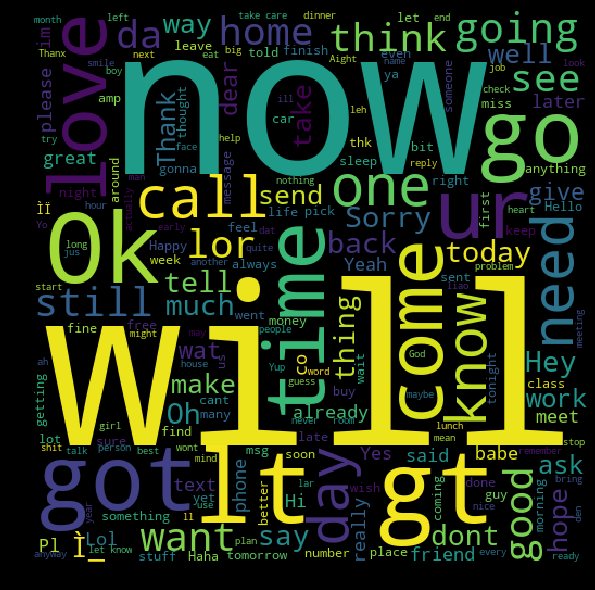

In [15]:
ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## 6. Feature Extraction<a id = "16"></a>
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [16]:
# Convert a collection of text documents to a matrix of token counts
# message_bow stands for bag of words

from sklearn.feature_extraction.text import CountVectorizer
message_bow = CountVectorizer(analyzer=process_text).fit_transform(mails['message'])

## 7. Train and Test split<a id = "17"></a>

In [17]:
# split the data into 80% training and 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message_bow, mails['label'], test_size=0.20, random_state=0)

In [18]:
#shape of message_bow

message_bow.shape

(5169, 11304)

## 8. Predictive analysis<a id = "18"></a>

In [19]:
# Create and train the naive Bayes classifier
# The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [20]:
# print the predictions
print(classifier.predict(X_train))

# print the actual values
print(y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


## 9. Model Evaluation<a id = "19"></a>

In [21]:
# Evaluate the model on the training data set

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_train, pred))
print()
print('Accuracy : ',accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       0.98      0.98      0.98       504

    accuracy                           1.00      4135
   macro avg       0.99      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135


Confusion Matrix:
 [[3623    8]
 [  11  493]]

Accuracy :  0.9954050785973397


In [22]:
# print the predictions
print(classifier.predict(X_test))

# print the actual values
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [23]:
# Evaluate the model on the testing data set

pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034


Confusion Matrix:
 [[850  35]
 [ 11 138]]

Accuracy :  0.9555125725338491


### Conclusion : 
Thus, using naive bayes algorithm we can classify ham and spam messages. 
Accuracy on train data = 99% and Accuracy on test data = 95%